# import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data loading

In [ ]:
df_allar = pd.read_excel('arpajon_all_cold_storage.xlsx')
df_allar

,DateTime,tyness pince 2 (Wh),Froid Légumes T1 (Wh),Froid négatif T3 (Wh),sum,sump
0,2023-01-18,5181.71,4186.89,26366.67,35735.27,9368.60
1,2023-01-19,5174.91,5656.11,30897.57,41728.59,10831.02
2,2023-01-20,5025.28,4442.43,29002.35,38470.06,9467.71
3,2023-01-21,5650.76,3655.83,26457.84,35764.43,9306.59
4,2023-01-22,5080.36,3580.05,29224.35,37884.76,8660.41
...,...,...,...,...,...,...
343,2023-12-27,9096.50,5499.30,35686.77,50282.57,14595.80
344,2023-12-28,10791.60,4305.60,33989.43,49086.63,15097.20
345,2023-12-29,11451.70,8542.20,34989.90,54983.80,19993.90
346,2023-12-30,10596.10,8004.00,38212.17,56812.27,18600.10


In [ ]:
df_allar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DateTime               348 non-null    datetime64[ns]
 1   tyness pince 2 (Wh)    348 non-null    float64       
 2   Froid Légumes T1 (Wh)  348 non-null    float64       
 3   Froid négatif T3 (Wh)  348 non-null    float64       
 4   sum                    348 non-null    float64       
 5   sump                   348 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 16.4 KB


# Distribution

## Overall distribution for cold storage equipment

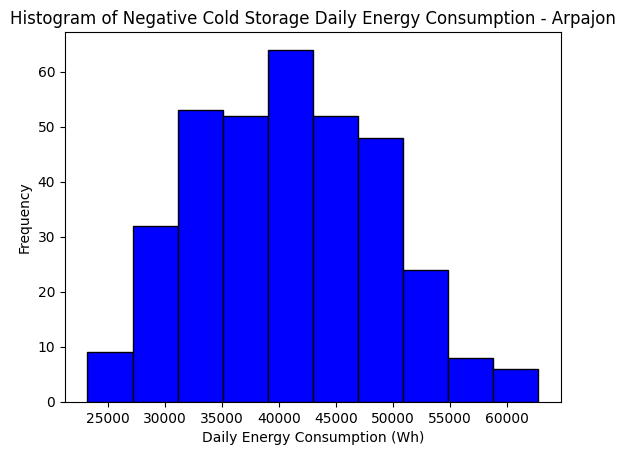

In [ ]:
plt.hist(df_allar['Froid négatif T3 (Wh)'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Negative Cold Storage Daily Energy Consumption - Arpajon')
plt.xlabel('Daily Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(df_allar['Froid négatif T3 (Wh)'].describe())

## 25%      34747.93500
## 75%      46839.15750

count      348.00000
mean     40991.93569
std       7982.39514
min      23234.73000
25%      34747.93500
50%      40644.99000
75%      46839.15750
max      62762.40000
Name: Froid négatif T3 (Wh), dtype: float64


## Seek for 25% and 75% percentage day's data

In [ ]:
print(df_allar.index)

DatetimeIndex(['2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21',
               '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-26', '2023-01-27',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='DateTime', length=348, freq=None)


In [ ]:
if 'DateTime' not in df_allar.columns:
    df_allar.reset_index(inplace=True)

# Recalculate the difference and find the nearest 10 days
df_allar['difference25'] = abs(df_allar['Froid négatif T3 (Wh)'] - 34747.93500)
closest_days_25 = df_allar.nsmallest(10, 'difference25')

print(closest_days_25['DateTime'])


78    2023-04-06
17    2023-02-04
94    2023-04-22
87    2023-04-15
63    2023-03-22
125   2023-05-23
72    2023-03-31
345   2023-12-29
308   2023-11-22
88    2023-04-16
Name: DateTime, dtype: datetime64[ns]


*   June - October
*   November - May



In [ ]:
df_jun_to_nov = df_allar[df_allar['DateTime'].dt.month.isin([6, 7, 8, 9, 10, 11])]

df_dec_to_may = df_allar[df_allar['DateTime'].dt.month.isin([12, 1, 2, 3, 4, 5])]

df_jun_to_nov['difference25'] = abs(df_jun_to_nov['Froid négatif T3 (Wh)'] - 34747.935)
df_dec_to_may['difference25'] = abs(df_dec_to_may['Froid négatif T3 (Wh)'] - 34747.935)

closest_days_jun_to_nov = df_jun_to_nov.nsmallest(10, 'difference25')
closest_days_dec_to_may = df_dec_to_may.nsmallest(10, 'difference25')

print("Closest Days from June to November:")
print(closest_days_jun_to_nov[['DateTime', 'Froid négatif T3 (Wh)']])

print("\nClosest Days from December to May:")
print(closest_days_dec_to_may[['DateTime', 'Froid négatif T3 (Wh)']])

Closest Days from June to November:
      DateTime  Froid négatif T3 (Wh)
308 2023-11-22               34500.00
296 2023-11-10               35017.50
313 2023-11-27               34086.00
314 2023-11-28               32906.10
306 2023-11-20               36721.83
295 2023-11-09               36790.80
135 2023-06-02               37086.09
315 2023-11-29               32085.00
289 2023-11-03               37487.70
168 2023-07-05               37500.06

Closest Days from December to May:
      DateTime  Froid négatif T3 (Wh)
78  2023-04-06               34773.90
17  2023-02-04               34670.04
94  2023-04-22               34827.06
87  2023-04-15               34842.69
63  2023-03-22               34605.45
125 2023-05-23               34921.65
72  2023-03-31               34549.68
345 2023-12-29               34989.90
88  2023-04-16               35010.30
325 2023-12-09               34465.50


<ipython-input-7-892f3a71e9d9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jun_to_nov['difference25'] = abs(df_jun_to_nov['Froid négatif T3 (Wh)'] - 34747.935)
<ipython-input-7-892f3a71e9d9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dec_to_may['difference25'] = abs(df_dec_to_may['Froid négatif T3 (Wh)'] - 34747.935)


*   2023-04-06
*   2023-04-15
*   2023-04-16
*   2023-04-22



In [ ]:
df_0406 = pd.read_excel('2023-04-06.xlsx')
df_0415 = pd.read_excel('2023-04-15.xlsx')
df_0416 = pd.read_excel('2023-04-16.xlsx')
df_0422 = pd.read_excel('2023-04-22.xlsx')

In [ ]:
df_allar['difference75'] = abs(df_allar['Froid négatif T3 (Wh)'] - 46839.15750)


df_jun_to_nov = df_allar[df_allar['DateTime'].dt.month.isin([6, 7, 8, 9, 10, 11])]
df_dec_to_may = df_allar[df_allar['DateTime'].dt.month.isin([12, 1, 2, 3, 4, 5])]

df_jun_to_nov['difference75'] = abs(df_jun_to_nov['Froid négatif T3 (Wh)'] - 46839.15750)
df_dec_to_may['difference75'] = abs(df_dec_to_may['Froid négatif T3 (Wh)'] - 46839.15750)

closest_days_jun_to_nov_75 = df_jun_to_nov.nsmallest(10, 'difference75')
closest_days_dec_to_may_75 = df_dec_to_may.nsmallest(10, 'difference75')

print("Closest Days from June to November:")
print(closest_days_jun_to_nov_75[['DateTime', 'Froid négatif T3 (Wh)']])

print("\nClosest Days from December to May:")
print(closest_days_dec_to_may_75[['DateTime', 'Froid négatif T3 (Wh)']])

Closest Days from June to November:
      DateTime  Froid négatif T3 (Wh)
259 2023-10-04               46802.70
250 2023-09-25               46775.10
216 2023-08-22               46719.90
225 2023-08-31               46961.40
190 2023-07-27               46706.10
261 2023-10-06               47078.70
170 2023-07-07               46593.57
309 2023-11-23               46581.90
226 2023-09-01               47099.40
151 2023-06-18               47118.99

Closest Days from December to May:
      DateTime  Froid négatif T3 (Wh)
103 2023-05-01               46948.53
319 2023-12-03               46098.90
109 2023-05-07               47597.64
127 2023-05-25               45709.65
330 2023-12-14               45084.60
101 2023-04-29               44984.31
108 2023-05-06               44891.40
318 2023-12-02               44408.40
326 2023-12-10               49307.37
124 2023-05-22               49514.28


<ipython-input-9-ced128c900eb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jun_to_nov['difference75'] = abs(df_jun_to_nov['Froid négatif T3 (Wh)'] - 46839.15750)
<ipython-input-9-ced128c900eb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dec_to_may['difference75'] = abs(df_dec_to_may['Froid négatif T3 (Wh)'] - 46839.15750)


*   2023-04-29
*   2023-05-01
*   2023-05-06
*   2023-05-07
*   2023-11-23


In [ ]:
# Because both low and high values ​​occur in April and May
# we focus on why there are huge fluctuations in values ​​in these two months.
df_0429 = pd.read_excel('2023-04-29.xlsx')
df_0501 = pd.read_excel('2023-05-01.xlsx')
df_0506 = pd.read_excel('2023-05-06.xlsx')
df_0507 = pd.read_excel('2023-05-07.xlsx')
df_1123 = pd.read_excel('2023-11-23.xlsx')

# Time series plot

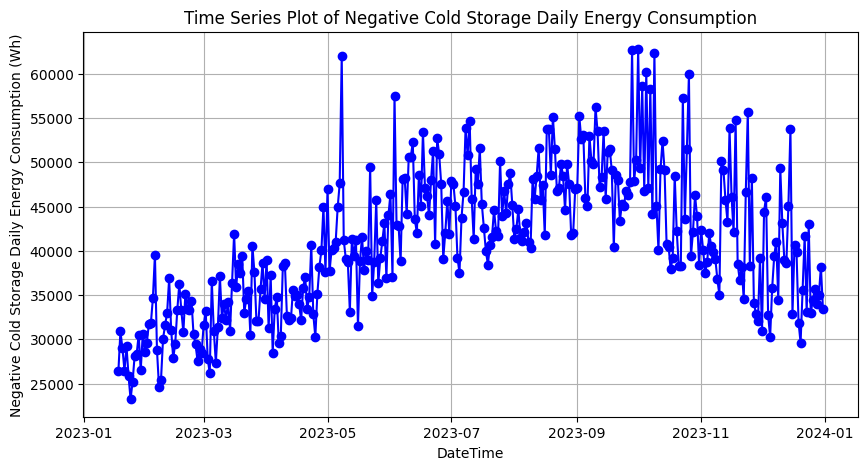

In [ ]:
df_allar.set_index('DateTime', inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_allar.index, df_allar['Froid négatif T3 (Wh)'], marker='.', linestyle='-', color='b')
plt.title('Time Series Plot of Negative Cold Storage Daily Energy Consumption')
plt.xlabel('DateTime')
plt.ylabel('Negative Cold Storage Daily Energy Consumption (Wh)')
plt.grid(True)
plt.show()

In [ ]:
df_0406

,DateTime,Froid négatif T3 (W)
0,2023-04-06 00:02:00,0.000000
1,2023-04-06 00:03:00,0.000000
2,2023-04-06 00:04:00,2443.278689
3,2023-04-06 00:05:00,2850.491803
4,2023-04-06 00:06:00,2850.491803
...,...,...
1407,2023-04-06 23:56:00,0.000000
1408,2023-04-06 23:57:00,0.000000
1409,2023-04-06 23:58:00,826.200000
1410,2023-04-06 23:59:00,2898.000000


In [ ]:
df_0406.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DateTime              1412 non-null   datetime64[ns]
 1   Froid négatif T3 (W)  1412 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.2 KB


In [ ]:
df_0406.set_index('DateTime', inplace=True)
df_0415.set_index('DateTime', inplace=True)
df_0416.set_index('DateTime', inplace=True)
df_0422.set_index('DateTime', inplace=True)
df_0429.set_index('DateTime', inplace=True)
df_0501.set_index('DateTime', inplace=True)
df_0506.set_index('DateTime', inplace=True)
df_0507.set_index('DateTime', inplace=True)
df_1123.set_index('DateTime', inplace=True)

## 25% good days:
- 2023-04-06
- 2023-04-15
- 2023-04-16
- 2023-04-22

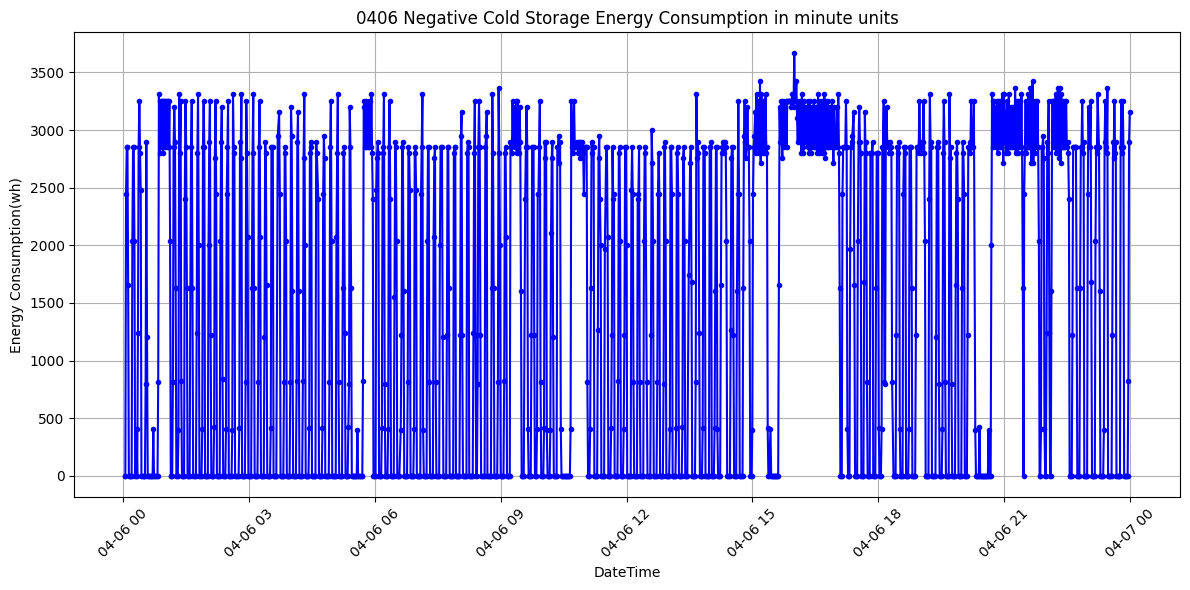

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_0406.index, df_0406['Froid négatif T3 (W)'], marker='.', linestyle='-', color='b')
plt.title('0406 Negative Cold Storage Energy Consumption in minute units')
plt.xlabel('DateTime')
plt.ylabel('Energy Consumption(wh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

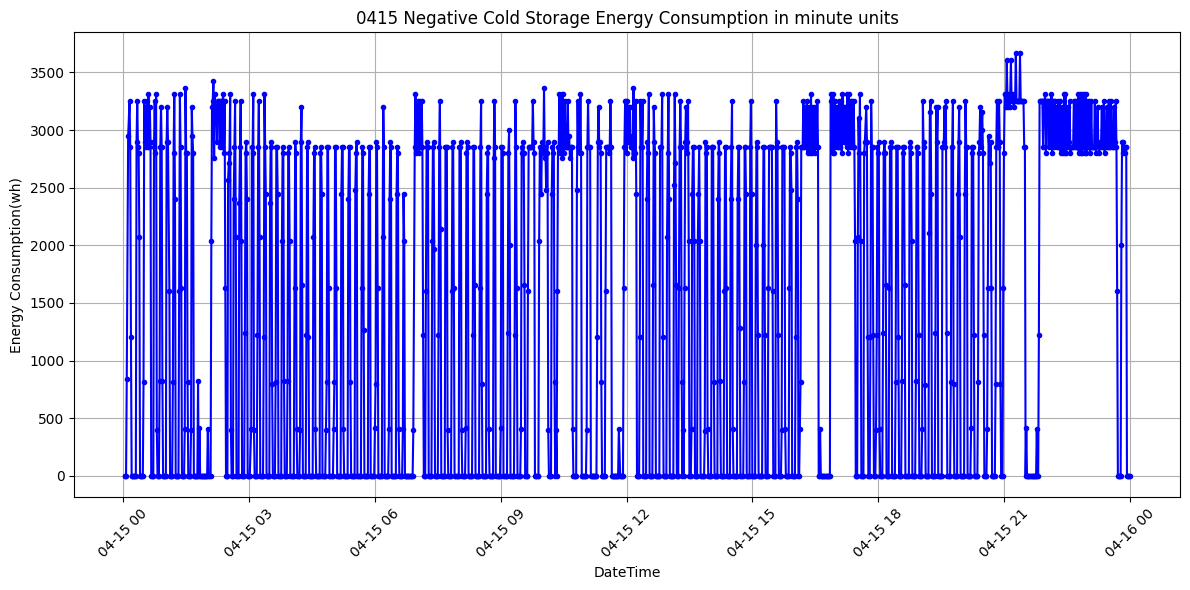

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_0415.index, df_0415['Froid négatif T3 (W)'], marker='.', linestyle='-', color='b')
plt.title('0415 Negative Cold Storage Energy Consumption in minute units')
plt.xlabel('DateTime')
plt.ylabel('Energy Consumption(wh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

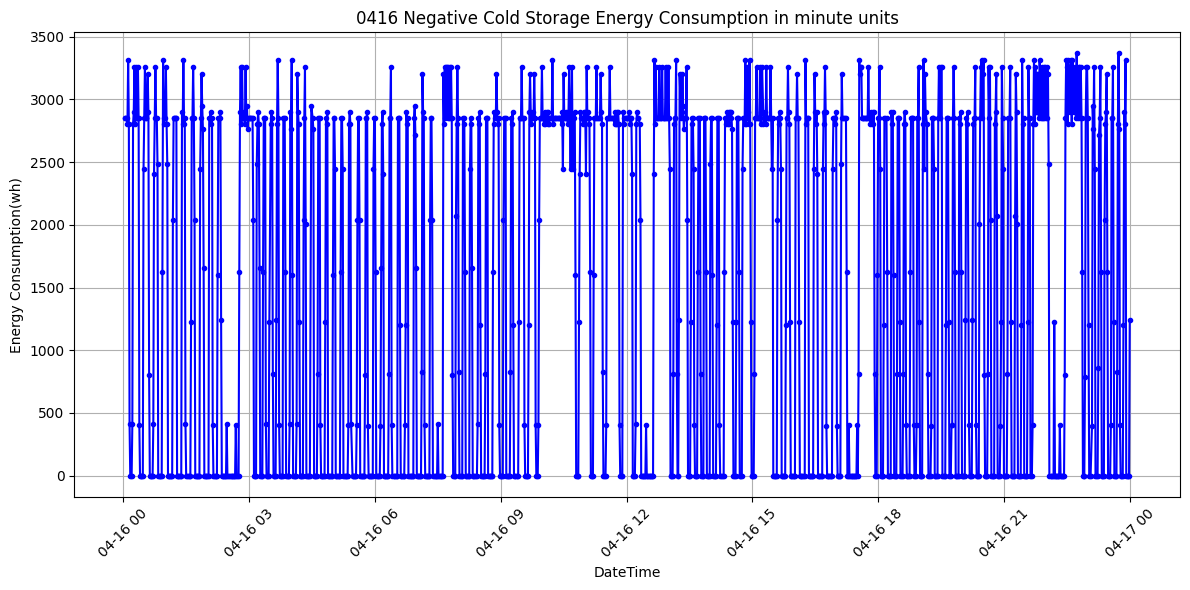

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_0416.index, df_0416['Froid négatif T3 (W)'], marker='.', linestyle='-', color='b')
plt.title('0416 Negative Cold Storage Energy Consumption in minute units')
plt.xlabel('DateTime')
plt.ylabel('Energy Consumption(wh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

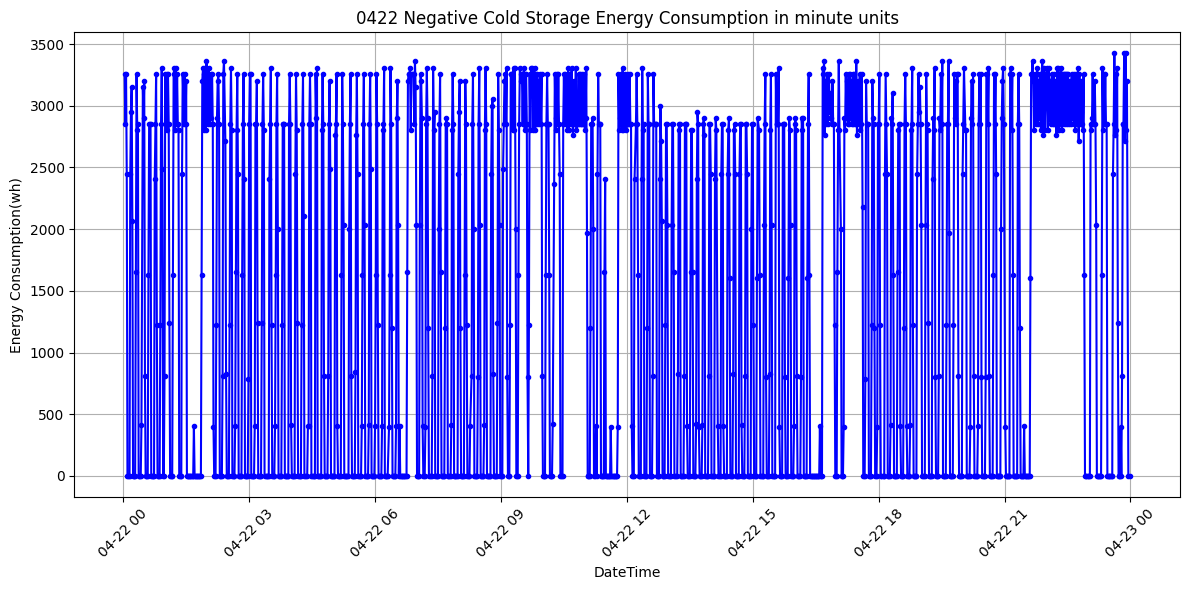

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_0422.index, df_0422['Froid négatif T3 (W)'], marker='.', linestyle='-', color='b')
plt.title('0422 Negative Cold Storage Energy Consumption in minute units')
plt.xlabel('DateTime')
plt.ylabel('Energy Consumption(wh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 75% bad days:
- 2023-04-29
- 2023-05-01
- 2023-05-06
- 2023-05-07
- 2023-11-23

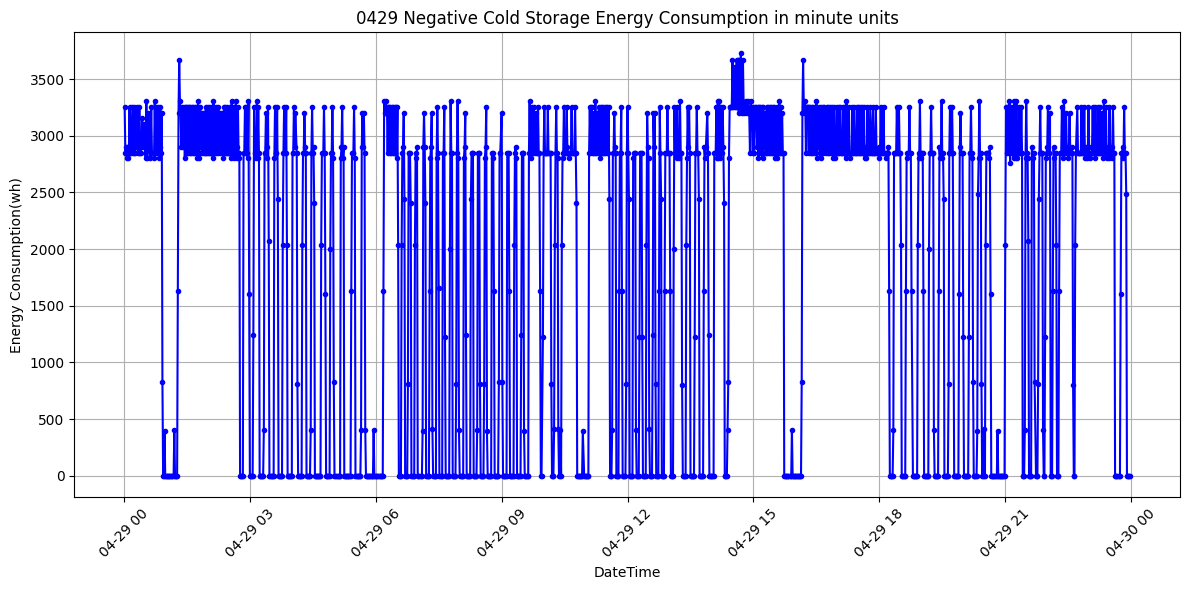

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_0429.index, df_0429['Froid négatif T3 (W)'], marker='.', linestyle='-', color='b')
plt.title('0429 Negative Cold Storage Energy Consumption in minute units')
plt.xlabel('DateTime')
plt.ylabel('Energy Consumption(wh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

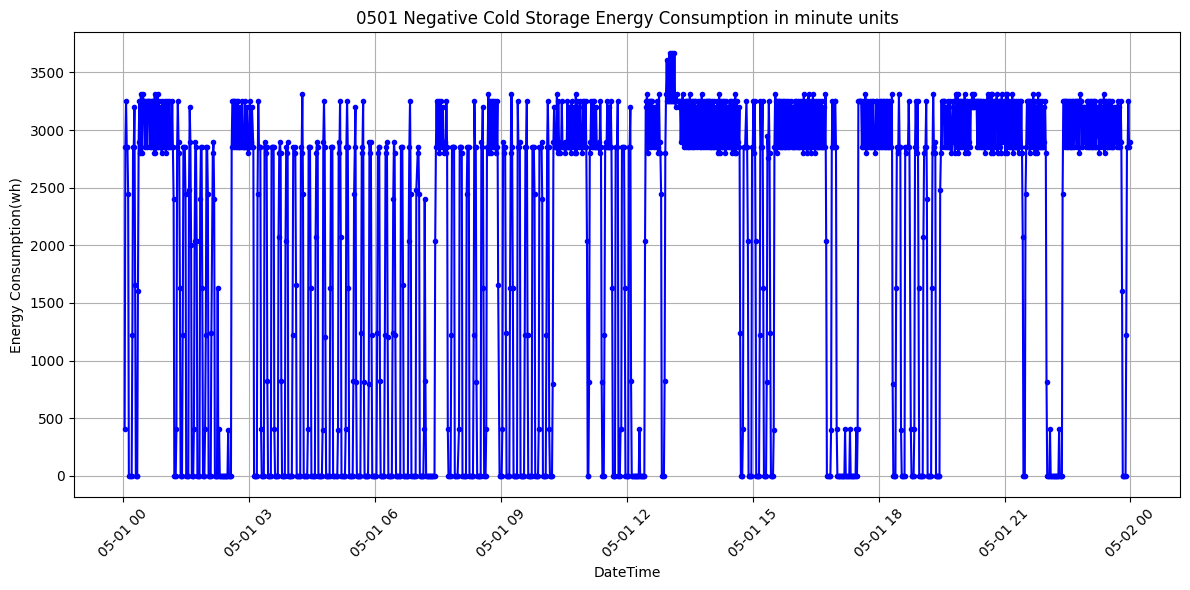

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_0501.index, df_0501['Froid négatif T3 (W)'], marker='.', linestyle='-', color='b')
plt.title('0501 Negative Cold Storage Energy Consumption in minute units')
plt.xlabel('DateTime')
plt.ylabel('Energy Consumption(wh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

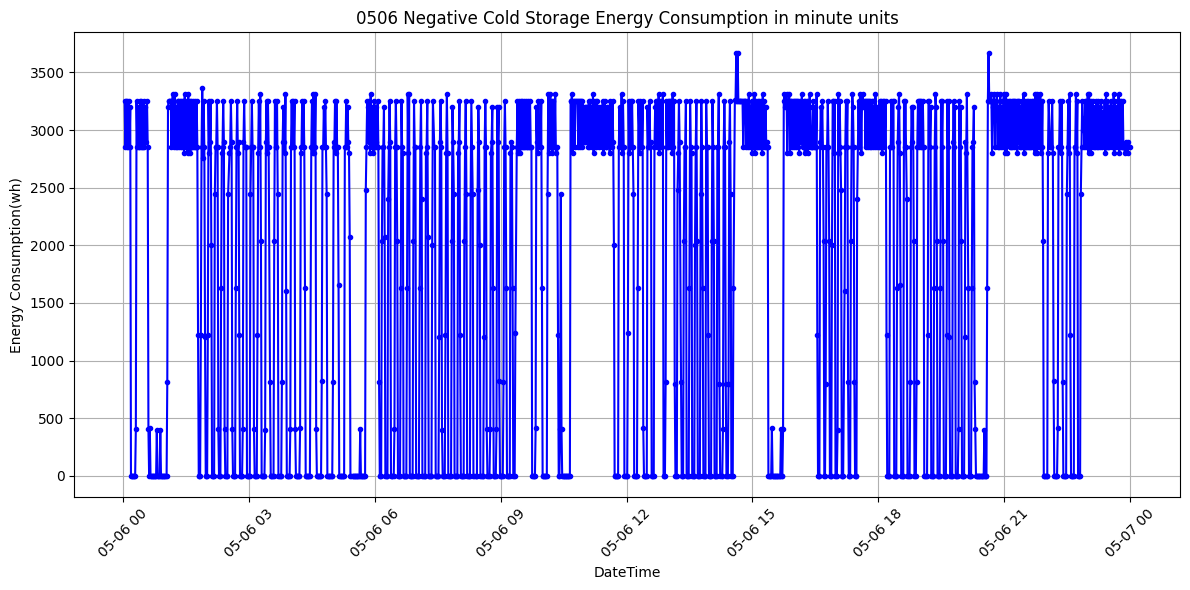

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_0506.index, df_0506['Froid négatif T3 (W)'], marker='.', linestyle='-', color='b')
plt.title('0506 Negative Cold Storage Energy Consumption in minute units')
plt.xlabel('DateTime')
plt.ylabel('Energy Consumption(wh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

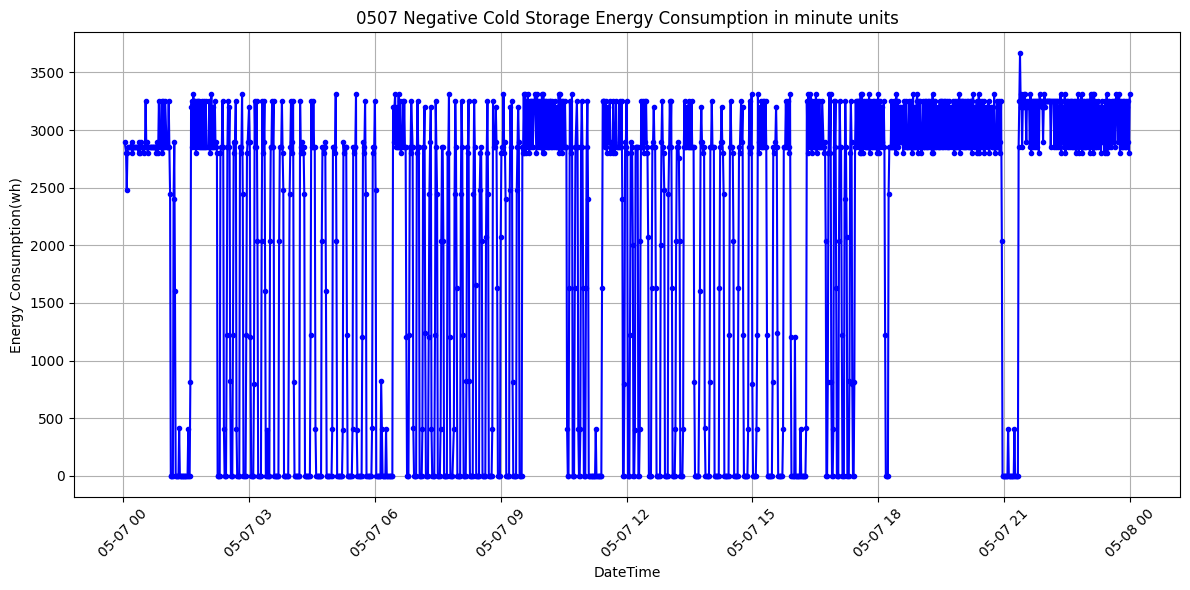

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_0507.index, df_0507['Froid négatif T3 (W)'], marker='.', linestyle='-', color='b')
plt.title('0507 Negative Cold Storage Energy Consumption in minute units')
plt.xlabel('DateTime')
plt.ylabel('Energy Consumption(wh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

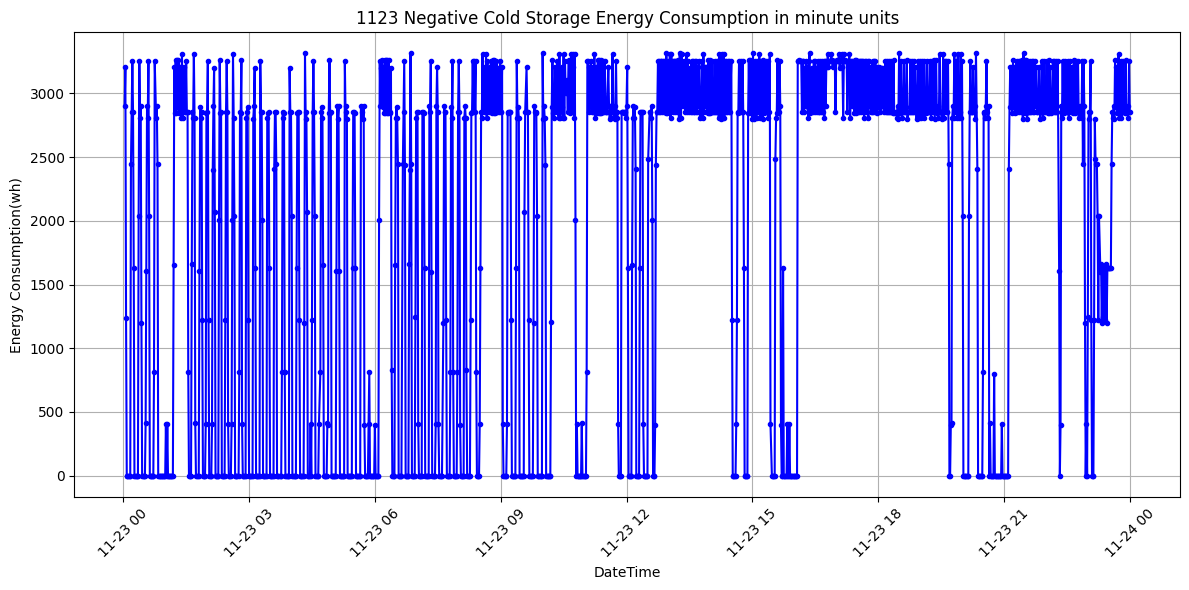

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_1123.index, df_1123['Froid négatif T3 (W)'], marker='.', linestyle='-', color='b')
plt.title('1123 Negative Cold Storage Energy Consumption in minute units')
plt.xlabel('DateTime')
plt.ylabel('Energy Consumption(wh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data process


*   In order to first understand the fluctuation of the machine's value without the influence of human operation, we divided the day into 2:00-8:00 and other times. By comparison, we found that without human intervention, the energy consumption of machines on adjacent dates was similar.




## Split into 2:00-8:00 and others

### 25% good days:
- 2023-04-06
- 2023-04-15
- 2023-04-16
- 2023-04-22

In [ ]:
# Select data from 02:00:00 to 08:00:00
early_morning = df_0406.between_time('02:00:00', '08:00:00')

# Select data for other times
other_times = df_0406[~df_0406.index.isin(early_morning.index)]

# Calculate the sum
sum_early_morning = early_morning['Froid négatif T3 (W)'].sum()
sum_other_times = other_times['Froid négatif T3 (W)'].sum()

print("Sum of 0406 from 02:00:00 to 08:00:00:", sum_early_morning)
print("Sum of 0406 for other times:", sum_other_times)

Sum of 0406 from 02:00:00 to 08:00:00: 365038.035801377
Sum of 0406 for other times: 1685335.025890161


In [ ]:
early_morning = df_0415.between_time('02:00:00', '08:00:00')

other_times = df_0415[~df_0415.index.isin(early_morning.index)]

sum_early_morning = early_morning['Froid négatif T3 (W)'].sum()
sum_other_times = other_times['Froid négatif T3 (W)'].sum()

print("Sum of 0415 from 02:00:00 to 08:00:00:", sum_early_morning)
print("Sum of 0415 for other times:", sum_other_times)

Sum of 0415 from 02:00:00 to 08:00:00: 393184.7640986501
Sum of 0415 for other times: 1659552.5097243679


In [ ]:
early_morning = df_0416.between_time('02:00:00', '08:00:00')

other_times = df_0416[~df_0416.index.isin(early_morning.index)]

sum_early_morning = early_morning['Froid négatif T3 (W)'].sum()
sum_other_times = other_times['Froid négatif T3 (W)'].sum()

print("Sum of 0416 from 02:00:00 to 08:00:00:", sum_early_morning)
print("Sum of 0416 for other times:", sum_other_times)

Sum of 0416 from 02:00:00 to 08:00:00: 384977.4803240596
Sum of 0416 for other times: 1679085.0399205755


In [ ]:
early_morning = df_0422.between_time('02:00:00', '08:00:00')

other_times = df_0422[~df_0422.index.isin(early_morning.index)]

sum_early_morning = early_morning['Froid négatif T3 (W)'].sum()
sum_other_times = other_times['Froid négatif T3 (W)'].sum()

print("Sum of 0422 from 02:00:00 to 08:00:00:", sum_early_morning)
print("Sum of 0422 for other times:", sum_other_times)

Sum of 0422 from 02:00:00 to 08:00:00: 412764.6939353675
Sum of 0422 for other times: 1641607.2103991907


In [ ]:
early_morning = df_0422.between_time('03:00:00', '08:00:00')

other_times = df_0422[~df_0422.index.isin(early_morning.index)]

sum_early_morning = early_morning['Froid négatif T3 (W)'].sum()
sum_other_times = other_times['Froid négatif T3 (W)'].sum()

print("Sum of 0422 from 03:00:00 to 08:00:00:", sum_early_morning)
print("Sum of 0422 for other times:", sum_other_times)

Sum of 0422 from 03:00:00 to 08:00:00: 328656.3450359357
Sum of 0422 for other times: 1725715.5592986224


### 75% bad days:
- 2023-04-29
- 2023-05-01
- 2023-05-06
- 2023-05-07
- 2023-11-23

In [ ]:
early_morning = df_0429.between_time('02:00:00', '08:00:00')

other_times = df_0429[~df_0429.index.isin(early_morning.index)]

sum_early_morning = early_morning['Froid négatif T3 (W)'].sum()
sum_other_times = other_times['Froid négatif T3 (W)'].sum()

print("Sum of 0429 from 02:00:00 to 08:00:00:", sum_early_morning)
print("Sum of 0429 for other times:", sum_other_times)

Sum of 0429 from 02:00:00 to 08:00:00: 536530.3767318883
Sum of 0429 for other times: 2113636.3698915197


In [ ]:
early_morning = df_0429.between_time('03:00:00', '08:00:00')

other_times = df_0429[~df_0429.index.isin(early_morning.index)]

sum_early_morning = early_morning['Froid négatif T3 (W)'].sum()
sum_other_times = other_times['Froid négatif T3 (W)'].sum()

print("Sum of 0429 from 03:00:00 to 08:00:00:", sum_early_morning)
print("Sum of 0429 for other times:", sum_other_times)

Sum of 0429 from 03:00:00 to 08:00:00: 375816.899841354
Sum of 0429 for other times: 2274349.8467820543


In [ ]:
early_morning = df_0501.between_time('02:00:00', '08:00:00')

other_times = df_0501[~df_0501.index.isin(early_morning.index)]

sum_early_morning = early_morning['Froid négatif T3 (W)'].sum()
sum_other_times = other_times['Froid négatif T3 (W)'].sum()

print("Sum of 0501 from 02:00:00 to 08:00:00:", sum_early_morning)
print("Sum of 0501 for other times:", sum_other_times)

Sum of 0501 from 02:00:00 to 08:00:00: 422887.26155473315
Sum of 0501 for other times: 2346623.3527825857


In [ ]:
early_morning = df_0506.between_time('02:00:00', '08:00:00')

other_times = df_0506[~df_0506.index.isin(early_morning.index)]

sum_early_morning = early_morning['Froid négatif T3 (W)'].sum()
sum_other_times = other_times['Froid négatif T3 (W)'].sum()

print("Sum of 0506 from 02:00:00 to 08:00:00:", sum_early_morning)
print("Sum of 0506 for other times:", sum_other_times)

Sum of 0506 from 02:00:00 to 08:00:00: 492480.09423585434
Sum of 0506 for other times: 2149016.61565859


In [ ]:
early_morning = df_0507.between_time('02:00:00', '08:00:00')

other_times = df_0507[~df_0507.index.isin(early_morning.index)]

sum_early_morning = early_morning['Froid négatif T3 (W)'].sum()
sum_other_times = other_times['Froid négatif T3 (W)'].sum()

print("Sum of 0507 from 02:00:00 to 08:00:00:", sum_early_morning)
print("Sum of 0507 for other times:", sum_other_times)

Sum of 0507 from 02:00:00 to 08:00:00: 481144.35864621913
Sum of 0507 for other times: 2323825.307879431


In [ ]:
early_morning = df_1123.between_time('02:00:00', '08:00:00')

other_times = df_1123[~df_1123.index.isin(early_morning.index)]

sum_early_morning = early_morning['Froid négatif T3 (W)'].sum()
sum_other_times = other_times['Froid négatif T3 (W)'].sum()

print("Sum of 1123 from 02:00:00 to 08:00:00:", sum_early_morning)
print("Sum of 1123 for other times:", sum_other_times)

Sum of 1123 from 02:00:00 to 08:00:00: 400407.3575885771
Sum of 1123 for other times: 2344267.2750376086


# Warning alert system


*   To detect which metric to distinguish normal and abnormal data pattern -> we set the number of 'processes' lasting more than 30 minutes as the basis for determining whether employees are using the equipment properly.




## 0406

In [ ]:
# Mark whether the value exceeds 2500
df_0406['over_2500'] = df_0406['Froid négatif T3 (W)'] > 2500
df_0406['shifted'] = df_0406['over_2500'].shift(1).fillna(False)  # Fill NaN values to avoid type error

# Mark start and end events
df_0406['start'] = df_0406['over_2500'] & ~df_0406['shifted']
df_0406['end'] = ~df_0406['over_2500'] & df_0406['shifted']

# Get start and end times
starts = df_0406[df_0406['start']].index
ends = df_0406[df_0406['end']].index

# Ensure each start time has a corresponding end time
if ends[0] < starts[0]:
    ends = ends[1:]

# Calculate the duration of each event
durations = [(end - start).seconds for start, end in zip(starts, ends)]

# Create a new DataFrame to store this information
df_0406w = pd.DataFrame({
    'Start Time': starts[:len(ends)],
    'End Time': ends,
    'Duration': durations
})

# Add duration categories
df_0406w['Duration Category'] = pd.cut(df_0406w['Duration'],
                                       bins=[300, 600, 900, 1200, 1800, 3600, float('inf')],
                                       labels=['5-10 minutes', '10-15 minutes', '15-20 minutes',
                                               '20-30 minutes', '30 minutes to 1 hour', '1 hour+'])

# Print duration category results
print(df_0406w.groupby('Duration Category').size())


Duration Category
5-10 minutes            5
10-15 minutes           3
15-20 minutes           4
20-30 minutes           1
30 minutes to 1 hour    1
1 hour+                 1
dtype: int64


In [ ]:
df_0406w

,Start Time,End Time,Duration,Duration Category
0,2023-04-06 00:05:00,2023-04-06 00:07:00,120,NaN
1,2023-04-06 00:14:00,2023-04-06 00:16:00,120,NaN
2,2023-04-06 00:22:00,2023-04-06 00:25:00,180,NaN
3,2023-04-06 00:33:00,2023-04-06 00:34:00,60,NaN
4,2023-04-06 00:51:00,2023-04-06 01:07:00,960,15-20 minutes
...,...,...,...,...
117,2023-04-06 23:01:00,2023-04-06 23:05:00,240,NaN
118,2023-04-06 23:12:00,2023-04-06 23:17:00,300,NaN
119,2023-04-06 23:24:00,2023-04-06 23:29:00,300,NaN
120,2023-04-06 23:36:00,2023-04-06 23:41:00,300,NaN


## 0415

In [ ]:
df_0415['over_2500'] = df_0415['Froid négatif T3 (W)'] > 2500
df_0415['shifted'] = df_0415['over_2500'].shift(1).fillna(False)

df_0415['start'] = df_0415['over_2500'] & ~df_0415['shifted']
df_0415['end'] = ~df_0415['over_2500'] & df_0415['shifted']

starts = df_0415[df_0415['start']].index
ends = df_0415[df_0415['end']].index

if ends[0] < starts[0]:
    ends = ends[1:]

durations = [(end - start).seconds for start, end in zip(starts, ends)]

df_0415w = pd.DataFrame({
    'Start Time': starts[:len(ends)],
    'End Time': ends,
    'Duration': durations
})

df_0415w['Duration Category'] = pd.cut(df_0415w['Duration'],
                                       bins=[300, 600, 900, 1200, 1800, 3600, float('inf')],
                                       labels=['5-10 minutes', '10-15 minutes', '15-20 minutes',
                                               '20-30 minutes', '30 minutes to 1 hour', '1 hour+'])

print(df_0415w.groupby('Duration Category').size())


Duration Category
5-10 minutes            9
10-15 minutes           1
15-20 minutes           2
20-30 minutes           2
30 minutes to 1 hour    2
1 hour+                 1
dtype: int64


## 0416

In [ ]:
df_0416['over_2500'] = df_0416['Froid négatif T3 (W)'] > 2500
df_0416['shifted'] = df_0416['over_2500'].shift(1).fillna(False)

df_0416['start'] = df_0416['over_2500'] & ~df_0416['shifted']
df_0416['end'] = ~df_0416['over_2500'] & df_0416['shifted']

starts = df_0416[df_0416['start']].index
ends = df_0416[df_0416['end']].index

if ends[0] < starts[0]:
    ends = ends[1:]

durations = [(end - start).seconds for start, end in zip(starts, ends)]

df_0416w = pd.DataFrame({
    'Start Time': starts[:len(ends)],
    'End Time': ends,
    'Duration': durations
})

df_0416w['Duration Category'] = pd.cut(df_0416w['Duration'],
                                       bins=[300, 600, 900, 1200, 1800, 3600, float('inf')],
                                       labels=['5-10 minutes', '10-15 minutes', '15-20 minutes',
                                               '20-30 minutes', '30 minutes to 1 hour', '1 hour+'])

print(df_0416w.groupby('Duration Category').size())


Duration Category
5-10 minutes            13
10-15 minutes            6
15-20 minutes            2
20-30 minutes            5
30 minutes to 1 hour     1
1 hour+                  0
dtype: int64


## 0422

In [ ]:
df_0422['over_2500'] = df_0422['Froid négatif T3 (W)'] > 2500
df_0422['shifted'] = df_0422['over_2500'].shift(1).fillna(False)

df_0422['start'] = df_0422['over_2500'] & ~df_0422['shifted']
df_0422['end'] = ~df_0422['over_2500'] & df_0422['shifted']

starts = df_0422[df_0422['start']].index
ends = df_0422[df_0422['end']].index

if ends[0] < starts[0]:
    ends = ends[1:]

durations = [(end - start).seconds for start, end in zip(starts, ends)]

df_0422w = pd.DataFrame({
    'Start Time': starts[:len(ends)],
    'End Time': ends,
    'Duration': durations
})

df_0422w['Duration Category'] = pd.cut(df_0422w['Duration'],
                                       bins=[300, 600, 900, 1200, 1800, 3600, float('inf')],
                                       labels=['5-10 minutes', '10-15 minutes', '15-20 minutes',
                                               '20-30 minutes', '30 minutes to 1 hour', '1 hour+'])

print(df_0422w.groupby('Duration Category').size())


Duration Category
5-10 minutes            10
10-15 minutes            2
15-20 minutes            4
20-30 minutes            1
30 minutes to 1 hour     1
1 hour+                  1
dtype: int64


## 0429

In [ ]:
df_0429['over_2500'] = df_0429['Froid négatif T3 (W)'] > 2500
df_0429['shifted'] = df_0429['over_2500'].shift(1).fillna(False)

df_0429['start'] = df_0429['over_2500'] & ~df_0429['shifted']
df_0429['end'] = ~df_0429['over_2500'] & df_0429['shifted']

starts = df_0429[df_0429['start']].index
ends = df_0429[df_0429['end']].index

if ends[0] < starts[0]:
    ends = ends[1:]

durations = [(end - start).seconds for start, end in zip(starts, ends)]

df_0429w = pd.DataFrame({
    'Start Time': starts[:len(ends)],
    'End Time': ends,
    'Duration': durations
})

df_0429w['Duration Category'] = pd.cut(df_0429w['Duration'],
                                       bins=[300, 600, 900, 1200, 1800, 3600, float('inf')],
                                       labels=['5-10 minutes', '10-15 minutes', '15-20 minutes',
                                               '20-30 minutes', '30 minutes to 1 hour', '1 hour+'])

print(df_0429w.groupby('Duration Category').size())


Duration Category
5-10 minutes            15
10-15 minutes            3
15-20 minutes            4
20-30 minutes            2
30 minutes to 1 hour     2
1 hour+                  3
dtype: int64


## 0501

In [ ]:
df_0501['over_2500'] = df_0501['Froid négatif T3 (W)'] > 2500
df_0501['shifted'] = df_0501['over_2500'].shift(1).fillna(False)

df_0501['start'] = df_0501['over_2500'] & ~df_0501['shifted']
df_0501['end'] = ~df_0501['over_2500'] & df_0501['shifted']

starts = df_0501[df_0501['start']].index
ends = df_0501[df_0501['end']].index

if ends[0] < starts[0]:
    ends = ends[1:]

durations = [(end - start).seconds for start, end in zip(starts, ends)]

df_0501w = pd.DataFrame({
    'Start Time': starts[:len(ends)],
    'End Time': ends,
    'Duration': durations
})

df_0501w['Duration Category'] = pd.cut(df_0501w['Duration'],
                                       bins=[300, 600, 900, 1200, 1800, 3600, float('inf')],
                                       labels=['5-10 minutes', '10-15 minutes', '15-20 minutes',
                                               '20-30 minutes', '30 minutes to 1 hour', '1 hour+'])

print(df_0501w.groupby('Duration Category').size())


Duration Category
5-10 minutes            5
10-15 minutes           0
15-20 minutes           3
20-30 minutes           2
30 minutes to 1 hour    4
1 hour+                 4
dtype: int64


## 0506

In [ ]:
df_0506['over_2500'] = df_0506['Froid négatif T3 (W)'] > 2500
df_0506['shifted'] = df_0506['over_2500'].shift(1).fillna(False)

df_0506['start'] = df_0506['over_2500'] & ~df_0506['shifted']
df_0506['end'] = ~df_0506['over_2500'] & df_0506['shifted']

starts = df_0506[df_0506['start']].index
ends = df_0506[df_0506['end']].index

if ends[0] < starts[0]:
    ends = ends[1:]

durations = [(end - start).seconds for start, end in zip(starts, ends)]

df_0506w = pd.DataFrame({
    'Start Time': starts[:len(ends)],
    'End Time': ends,
    'Duration': durations
})

df_0506w['Duration Category'] = pd.cut(df_0506w['Duration'],
                                       bins=[300, 600, 900, 1200, 1800, 3600, float('inf')],
                                       labels=['5-10 minutes', '10-15 minutes', '15-20 minutes',
                                               '20-30 minutes', '30 minutes to 1 hour', '1 hour+'])

print(df_0506w.groupby('Duration Category').size())


Duration Category
5-10 minutes            17
10-15 minutes            3
15-20 minutes            2
20-30 minutes            1
30 minutes to 1 hour     4
1 hour+                  2
dtype: int64


## 0507

In [ ]:
df_0507['over_2500'] = df_0507['Froid négatif T3 (W)'] > 2500
df_0507['shifted'] = df_0507['over_2500'].shift(1).fillna(False)

df_0507['start'] = df_0507['over_2500'] & ~df_0507['shifted']
df_0507['end'] = ~df_0507['over_2500'] & df_0507['shifted']

starts = df_0507[df_0507['start']].index
ends = df_0507[df_0507['end']].index

if ends[0] < starts[0]:
    ends = ends[1:]

durations = [(end - start).seconds for start, end in zip(starts, ends)]

df_0507w = pd.DataFrame({
    'Start Time': starts[:len(ends)],
    'End Time': ends,
    'Duration': durations
})

df_0507w['Duration Category'] = pd.cut(df_0507w['Duration'],
                                       bins=[300, 600, 900, 1200, 1800, 3600, float('inf')],
                                       labels=['5-10 minutes', '10-15 minutes', '15-20 minutes',
                                               '20-30 minutes', '30 minutes to 1 hour', '1 hour+'])

print(df_0507w.groupby('Duration Category').size())


Duration Category
5-10 minutes            10
10-15 minutes            2
15-20 minutes            1
20-30 minutes            2
30 minutes to 1 hour     2
1 hour+                  3
dtype: int64


## 1123

In [ ]:
df_1123['over_2500'] = df_1123['Froid négatif T3 (W)'] > 2500
df_1123['shifted'] = df_1123['over_2500'].shift(1).fillna(False)

df_1123['start'] = df_1123['over_2500'] & ~df_1123['shifted']
df_1123['end'] = ~df_1123['over_2500'] & df_1123['shifted']

starts = df_1123[df_1123['start']].index
ends = df_1123[df_1123['end']].index

if ends[0] < starts[0]:
    ends = ends[1:]

durations = [(end - start).seconds for start, end in zip(starts, ends)]

df_1123w = pd.DataFrame({
    'Start Time': starts[:len(ends)],
    'End Time': ends,
    'Duration': durations
})

df_1123w['Duration Category'] = pd.cut(df_1123w['Duration'],
                                       bins=[300, 600, 900, 1200, 1800, 3600, float('inf')],
                                       labels=['5-10 minutes', '10-15 minutes', '15-20 minutes',
                                               '20-30 minutes', '30 minutes to 1 hour', '1 hour+'])

print(df_1123w.groupby('Duration Category').size())


Duration Category
5-10 minutes            5
10-15 minutes           2
15-20 minutes           2
20-30 minutes           0
30 minutes to 1 hour    5
1 hour+                 3
dtype: int64
